<a href="https://colab.research.google.com/github/RanudeeFernando/PowerSpring/blob/create-backend/notebooks/energy_consumption_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Replace with your raw GitHub URL
url = "https://raw.githubusercontent.com/RanudeeFernando/PowerSpring/main/datasets/electricityConsumptionAndProductioction.csv"

# Load CSV into Pandas DataFrame
df = pd.read_csv(url)

# Display the first few rows
df.head()


,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
0,2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
1,2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2,2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
3,2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
4,2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46011 entries, 0 to 46010
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DateTime       46011 non-null  object
 1   Consumption    46011 non-null  int64 
 2   Production     46011 non-null  int64 
 3   Nuclear        46011 non-null  int64 
 4   Wind           46011 non-null  int64 
 5   Hydroelectric  46011 non-null  int64 
 6   Oil and Gas    46011 non-null  int64 
 7   Coal           46011 non-null  int64 
 8   Solar          46011 non-null  int64 
 9   Biomass        46011 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 3.5+ MB


In [3]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46011 entries, 0 to 46010
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DateTime       46011 non-null  datetime64[ns]
 1   Consumption    46011 non-null  int64         
 2   Production     46011 non-null  int64         
 3   Nuclear        46011 non-null  int64         
 4   Wind           46011 non-null  int64         
 5   Hydroelectric  46011 non-null  int64         
 6   Oil and Gas    46011 non-null  int64         
 7   Coal           46011 non-null  int64         
 8   Solar          46011 non-null  int64         
 9   Biomass        46011 non-null  int64         
dtypes: datetime64[ns](1), int64(9)
memory usage: 3.5 MB


In [5]:
df.describe()

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
count,46011,46011.000000,46011.000000,46011.000000,46011.000000,46011.000000,46011.000000,46011.000000,46011.000000,46011.000000
mean,2021-08-16 11:19:47.715981056,6587.616440,6518.645628,1291.177501,792.310882,1857.052444,1171.890418,1193.157332,156.688031,55.851862
min,2019-01-01 00:00:00,3889.000000,3315.000000,562.000000,-26.000000,175.000000,198.000000,279.000000,0.000000,17.000000
25%,2020-04-24 06:30:00,5773.000000,5814.000000,1347.000000,236.000000,1347.000000,858.000000,962.000000,0.000000,45.000000
50%,2021-08-16 12:00:00,6552.000000,6462.000000,1383.000000,592.000000,1747.000000,1211.000000,1172.000000,2.000000,57.000000
75%,2022-12-08 15:30:00,7321.000000,7176.000000,1405.000000,1205.000000,2265.000000,1511.000000,1406.000000,280.000000,67.000000
max,2024-03-31 23:00:00,9615.000000,9886.000000,1457.000000,2811.000000,4434.000000,2141.000000,2537.000000,1137.000000,89.000000
std,NaN,1043.654923,986.805018,236.549637,675.812712,692.592157,434.748917,320.449368,229.502650,14.235554


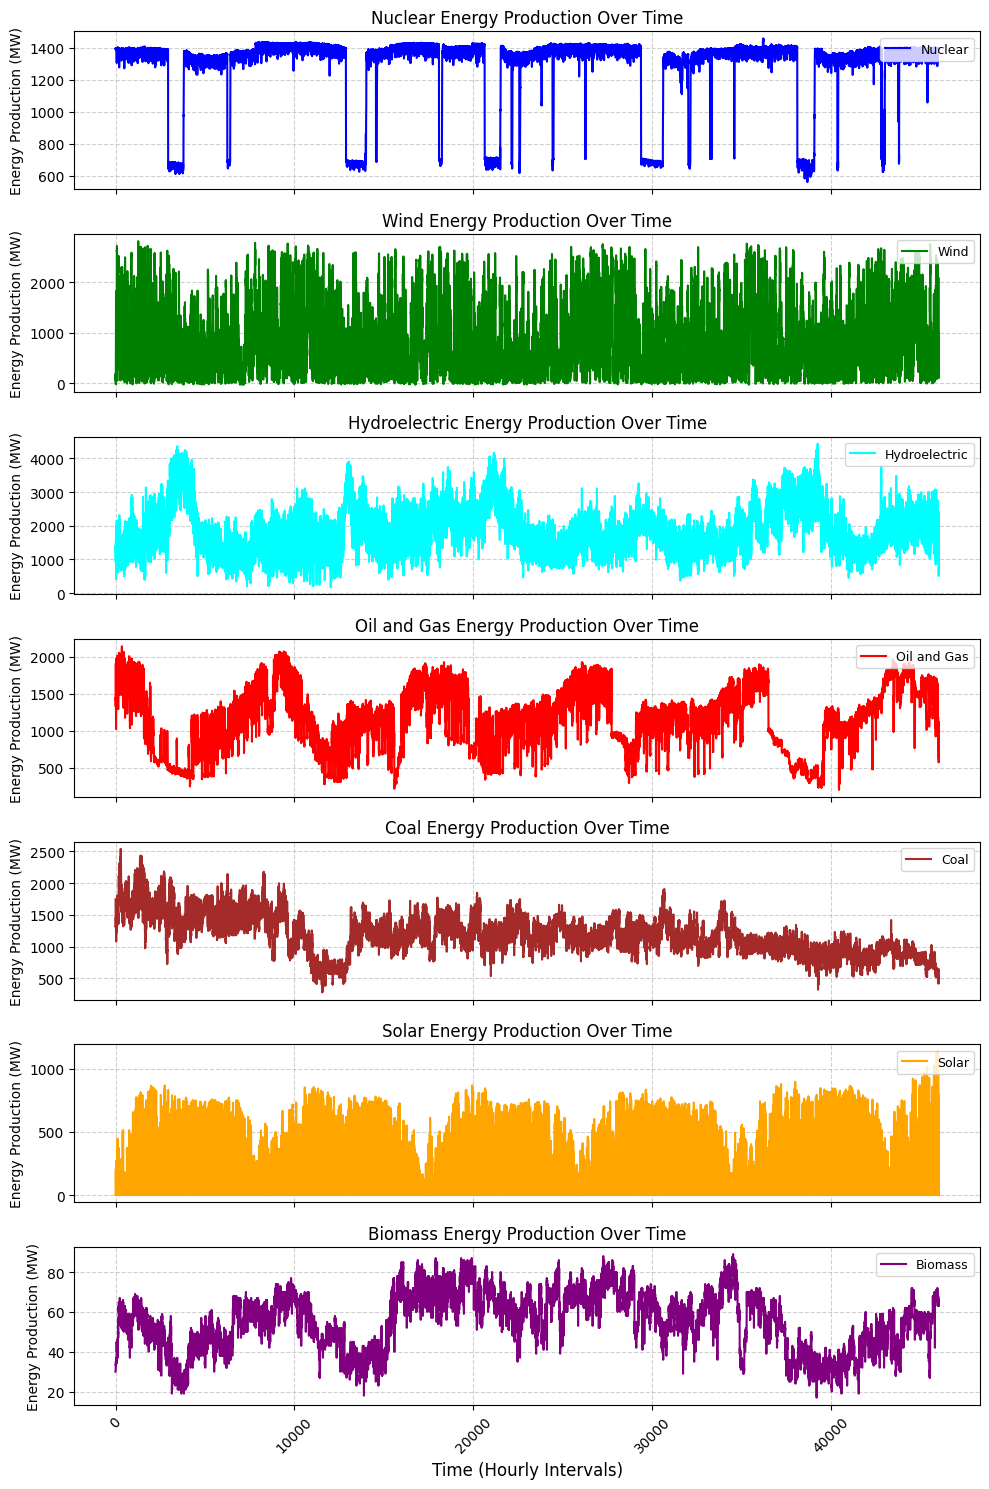

In [6]:
import matplotlib.pyplot as plt

# Define the energy sources
energy_sources = ['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']

# Create subplots with improved styling
fig, axes = plt.subplots(nrows=len(energy_sources), ncols=1, figsize=(10, 15), sharex=True)

# Define colors for better differentiation
colors = ['blue', 'green', 'cyan', 'red', 'brown', 'orange', 'purple']

# Plot each energy source in its own subplot
for i, source in enumerate(energy_sources):
    axes[i].plot(df.index, df[source], label=source, color=colors[i], linewidth=1.5)
    axes[i].set_ylabel('Energy Production (MW)', fontsize=10)
    axes[i].set_title(f'{source} Energy Production Over Time', fontsize=12)
    axes[i].grid(True, linestyle='--', alpha=0.6)
    axes[i].legend(loc="upper right", fontsize=9)

# Set common x-axis label and format layout
plt.xlabel('Time (Hourly Intervals)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


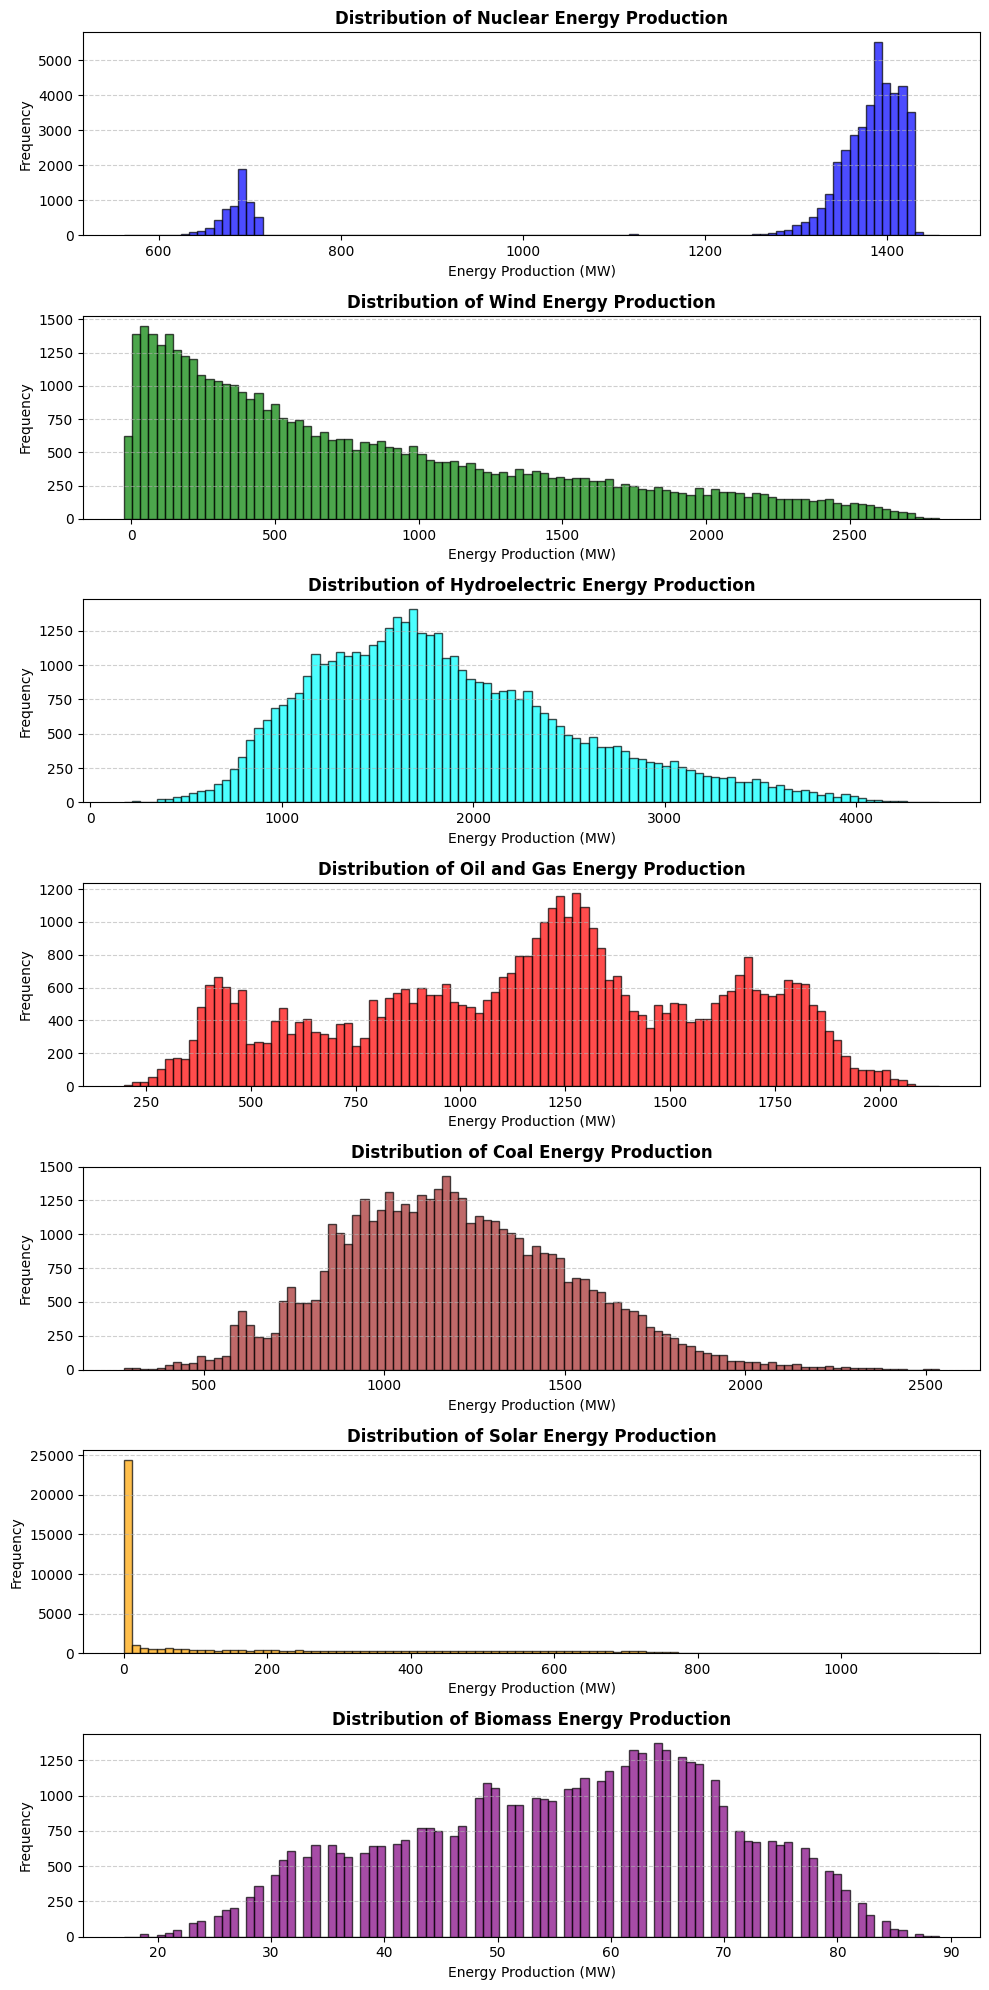

In [7]:
import matplotlib.pyplot as plt

# Define the energy sources
energy_sources = ['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']

# Create subplots for histograms
fig, axes = plt.subplots(nrows=len(energy_sources), ncols=1, figsize=(10, 20))

# Define colors for better differentiation
colors = ['blue', 'green', 'cyan', 'red', 'brown', 'orange', 'purple']

# Plot histograms for each energy source
for i, source in enumerate(energy_sources):
    axes[i].hist(df[source], bins=100, color=colors[i], alpha=0.7, edgecolor='black')
    axes[i].set_xlabel('Energy Production (MW)', fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)
    axes[i].set_title(f'Distribution of {source} Energy Production', fontsize=12, fontweight='bold')
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)

# Adjust layout for better readability
plt.tight_layout()

# Show the plots
plt.show()


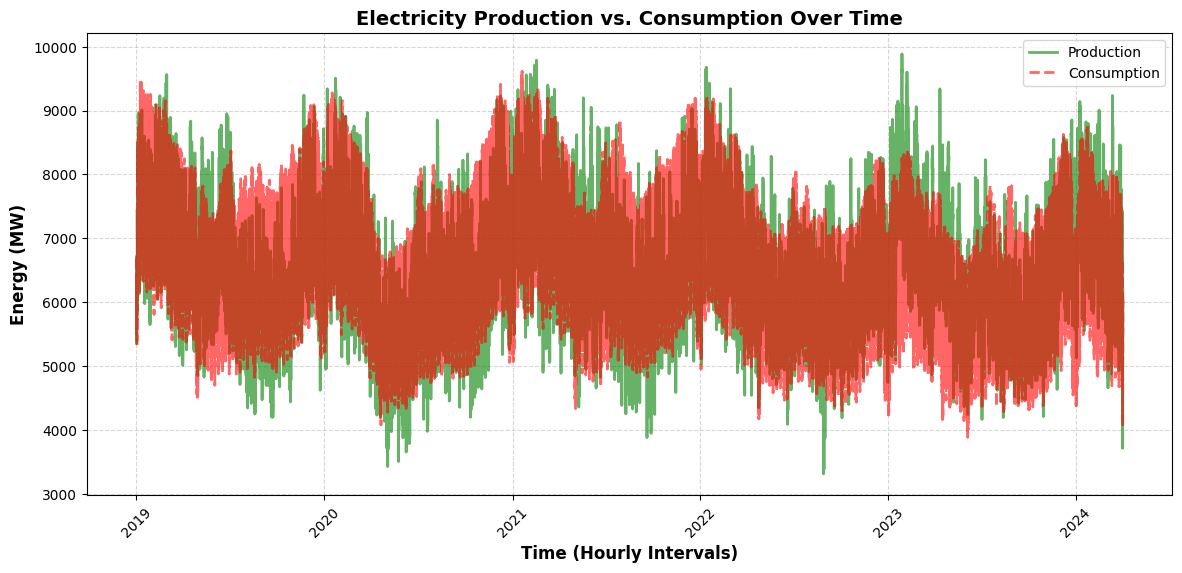

In [8]:
# Plot Production and Consumption over time with transparency
plt.figure(figsize=(14, 6))
plt.plot(df['DateTime'], df['Production'], label='Production', color='green', linewidth=2, alpha=0.6)
plt.plot(df['DateTime'], df['Consumption'], label='Consumption', color='red', linewidth=2, linestyle='dashed', alpha=0.6)

# Labels and title
plt.xlabel('Time (Hourly Intervals)', fontsize=12, fontweight='bold')
plt.ylabel('Energy (MW)', fontsize=12, fontweight='bold')
plt.title('Electricity Production vs. Consumption Over Time', fontsize=14, fontweight='bold')

# Grid and legend
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show plot
plt.show()


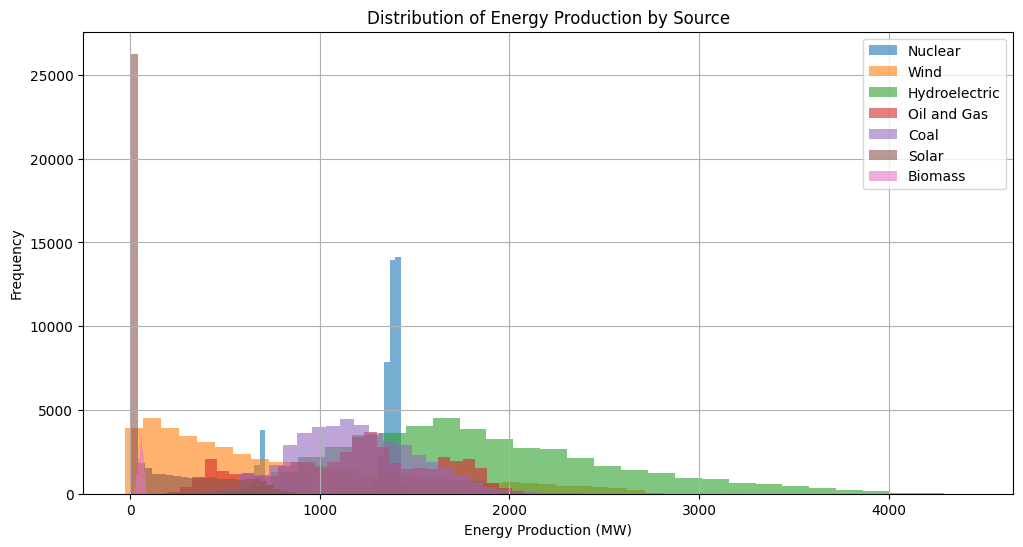

In [9]:
import matplotlib.pyplot as plt

energy_sources = ['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']

plt.figure(figsize=(12, 6))
for source in energy_sources:
    plt.hist(df[source], bins=30, alpha=0.6, label=source)

plt.xlabel('Energy Production (MW)')
plt.ylabel('Frequency')
plt.title('Distribution of Energy Production by Source')
plt.legend()
plt.grid(True)
plt.show()


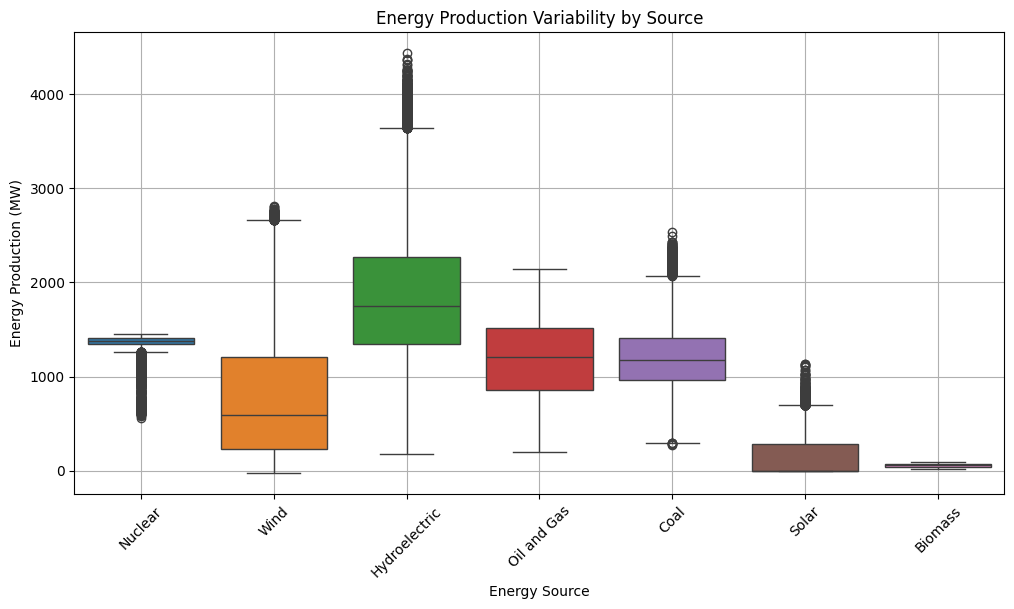

In [10]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[energy_sources])
plt.xlabel('Energy Source')
plt.ylabel('Energy Production (MW)')
plt.title('Energy Production Variability by Source')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


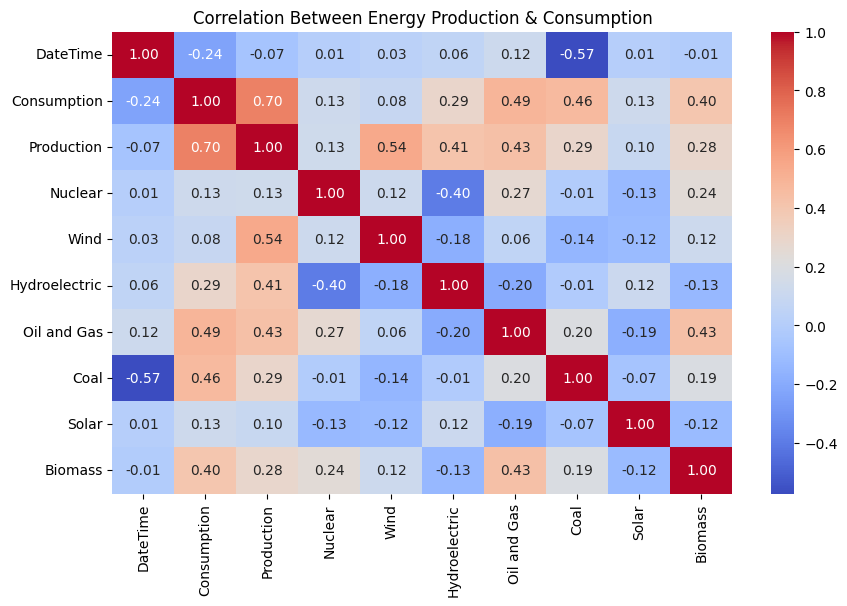

In [11]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Energy Production & Consumption')
plt.show()


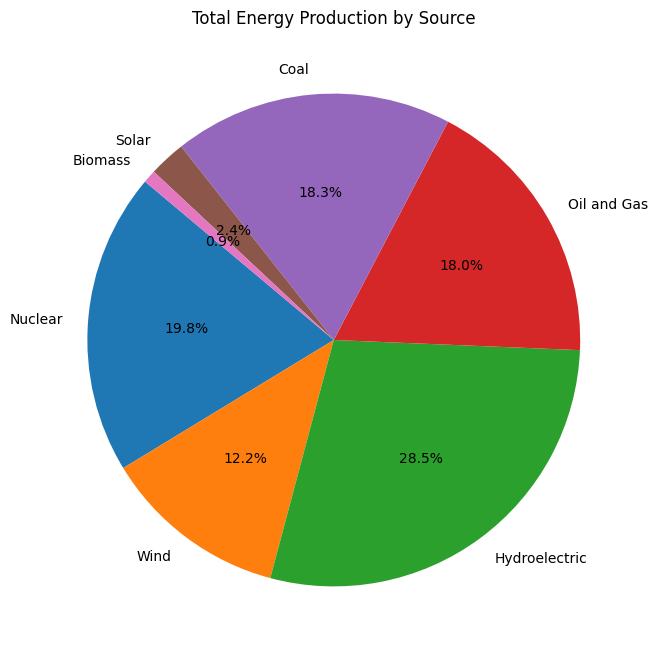

In [12]:
# Pie chart of total energy production by source
plt.figure(figsize=(8, 8))
total_production_by_source = df[energy_sources].sum()
plt.pie(total_production_by_source, labels=energy_sources, autopct='%1.1f%%', startangle=140)
plt.title('Total Energy Production by Source')
plt.show()


In [13]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import random

# Set seed for reproducibility
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

# Select features: now including 'Consumption' and 'Production'
energy_sources = ['Consumption', 'Production', 'Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']
data = df[energy_sources].values

# Normalize the data before splitting
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Function to create sequences for RNN
def create_sequences(data, seq_length=24):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])  # Predict next timestep
    return np.array(X), np.array(y)

# Define sequence length (e.g., using past 24 hours to predict the next)
SEQ_LENGTH = 24
X, y = create_sequences(data_scaled, SEQ_LENGTH)

# Split into training and testing sets (after sequence generation)
train_size = int(len(X) * 0.8)  # 80% train, 20% test
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the RNN model
model = Sequential([
    SimpleRNN(50, activation='relu', return_sequences=True, input_shape=(SEQ_LENGTH, len(energy_sources))),
    Dropout(0.2),
    SimpleRNN(50, activation='relu'),
    Dense(len(energy_sources))  # Output layer for all energy sources
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model performance
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Train Loss (MSE): {train_loss}")
print(f"Test Loss (MSE): {test_loss}")

# Make predictions for both train and test sets
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform predictions and actual values to original scale
train_predictions_original = scaler.inverse_transform(train_predictions)
test_predictions_original = scaler.inverse_transform(test_predictions)
y_train_original = scaler.inverse_transform(y_train)
y_test_original = scaler.inverse_transform(y_test)

# Compute R² Score for both train and test
r2_train = r2_score(y_train_original, train_predictions_original)
r2_test = r2_score(y_test_original, test_predictions_original)

print(f"Train R² Score: {r2_train:.4f}")
print(f"Test R² Score: {r2_test:.4f}")



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - loss: 0.0289 - val_loss: 0.0033
Epoch 2/20
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - loss: 0.0040 - val_loss: 0.0026
Epoch 3/20
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - loss: 0.0031 - val_loss: 0.0024
Epoch 4/20
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - loss: 0.0028 - val_loss: 0.0020
Epoch 5/20
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - loss: 0.0026 - val_loss: 0.0020
Epoch 6/20
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 7/20
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - loss: 0.0023 - val_loss: 0.0030
Epoch 8/20
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - loss: 0.0022 - val_loss: 0.0027
Epoch 9/20
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - loss: 0.0021 - val_loss: 0.0027
Epoch 10/20
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - loss: 0.0020 - val_loss: 0.0028
Epoch 11/20
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - loss: 0.0019 - val_loss: 0.0031
Epoch 12

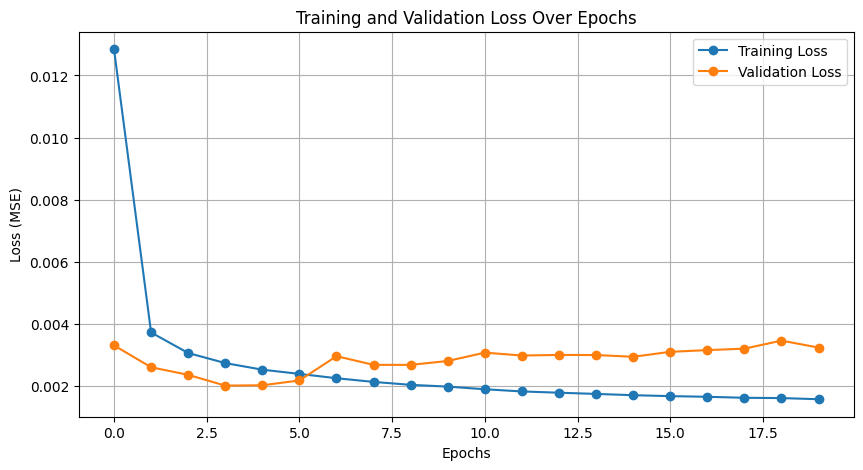

In [26]:
# Plot training & validation loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid()
plt.show()


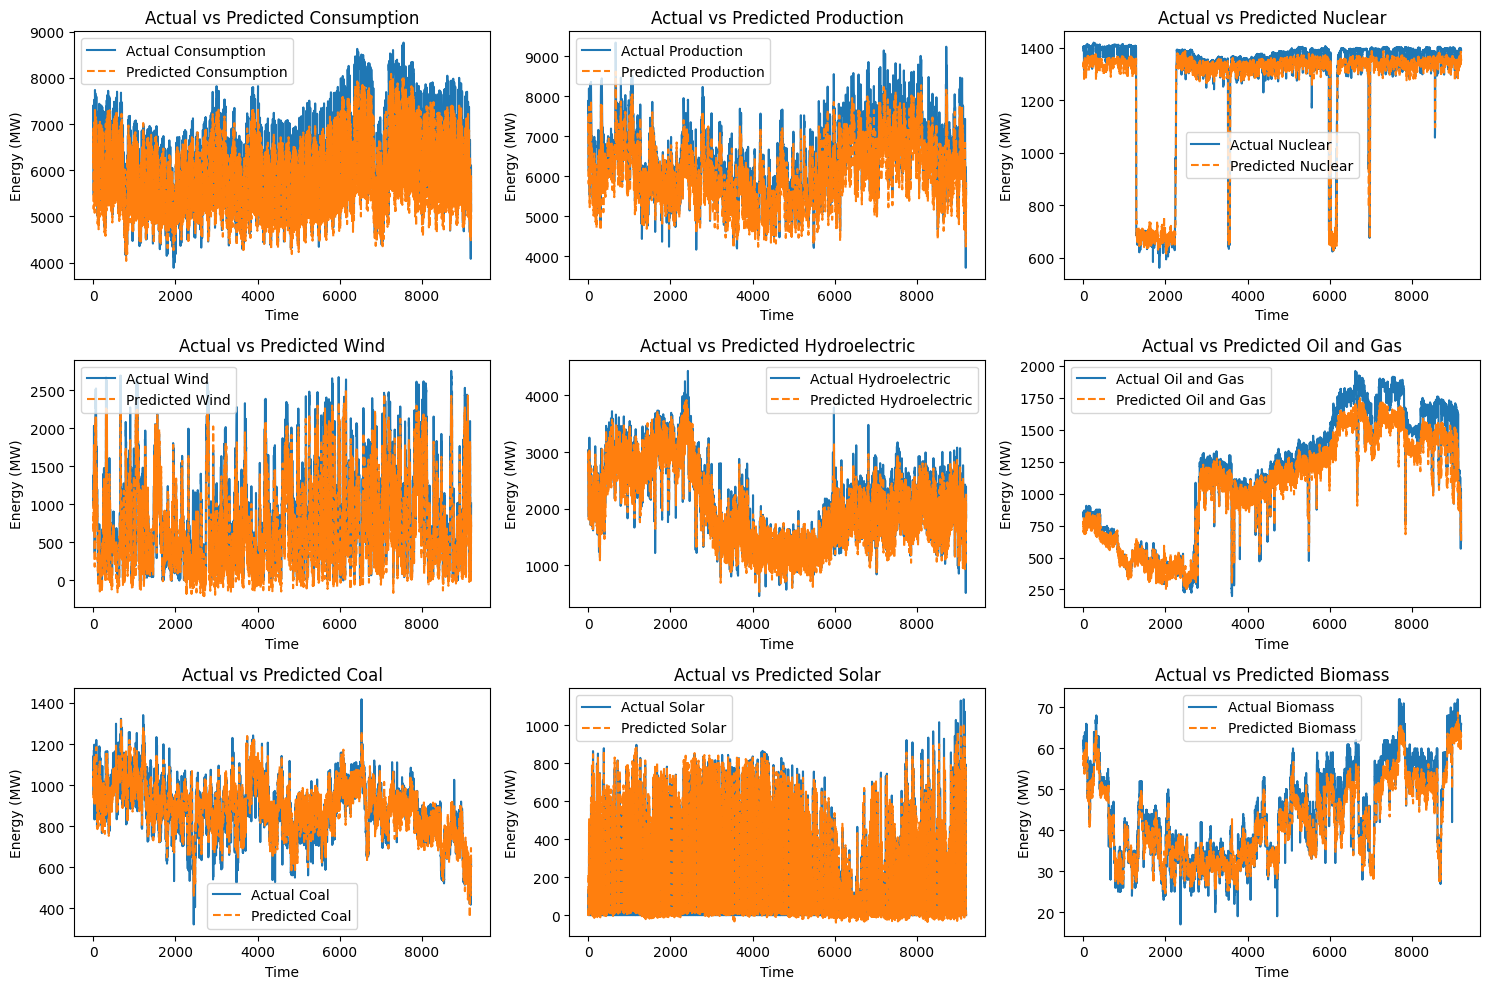

In [15]:
# Plot actual vs predicted for ALL energy sources
plt.figure(figsize=(15, 10))

for i, source in enumerate(energy_sources):
    plt.subplot(3, 3, i + 1)  # Arrange in 3x3 subplots
    plt.plot(y_test_original[:, i], label=f"Actual {source}")
    plt.plot(test_predictions_original[:, i], label=f"Predicted {source}", linestyle='dashed')
    plt.xlabel("Time")
    plt.ylabel("Energy (MW)")
    plt.title(f"Actual vs Predicted {source}")
    plt.legend()

plt.tight_layout()
plt.show()


In [16]:
import joblib

# Save the trained model
model.save("energy_rnn_model.h5")

# Save the scaler
joblib.dump(scaler, "scaler.pkl")

print("Model and Scaler saved successfully!")


Model and Scaler saved successfully!


In [17]:
# Load the model and explicitly define the loss function
loaded_model = tf.keras.models.load_model(
    "energy_rnn_model.h5",
    custom_objects={"mse": tf.keras.losses.MeanSquaredError()}
)

# Load the saved scaler
scaler = joblib.load("scaler.pkl")

print("Model and Scaler loaded successfully!")


Model and Scaler loaded successfully!


In [18]:
# Define how many past sequences you want to predict
num_sequences = 10

# Ensure there are enough rows in df
total_rows = len(df)
if total_rows < num_sequences * 24:
    raise ValueError(f"Not enough data! Dataset only has {total_rows} rows, but {num_sequences * 24} are required.")

# Select the last num_sequences 24-hour windows
X_multiple = []
for i in range(num_sequences, 0, -1):
    start_idx = -(24 * i)
    end_idx = -(24 * (i - 1)) if (24 * (i - 1)) != 0 else None

    past_24_hours = df[energy_sources].values[start_idx:end_idx]
    past_24_hours_scaled = scaler.transform(past_24_hours)
    X_multiple.append(past_24_hours_scaled)

# Convert to NumPy array and reshape to (num_samples, 24, num_features)
X_multiple = np.array(X_multiple).reshape(num_sequences, 24, len(energy_sources))

# Predict using the trained model
multiple_predictions_scaled = loaded_model.predict(X_multiple)

# Convert predictions back to original scale
multiple_predictions_original = scaler.inverse_transform(multiple_predictions_scaled)

# Display predictions
print("Predicted Energy Values for Multiple Timesteps:")
for i, pred in enumerate(multiple_predictions_original):
    print(f"Prediction {i+1}: {pred}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
Predicted Energy Values for Multiple Timesteps:
Prediction 1: [5725.0737   5837.446    1360.7415     79.6323   2125.962    1420.6921
  799.7216    -17.716825   58.758797]
Prediction 2: [5398.0254   6313.7407   1343.1456   1371.7426   1747.5941   1028.0924
  697.3278     25.33683    63.666393]
Prediction 3: [5.2897729e+03 5.6216548e+03 1.3569441e+03 4.2482413e+02 1.9974314e+03
 1.0826659e+03 6.4784399e+02 3.1197293e+00 6.2268333e+01]
Prediction 4: [5722.0986   7237.713    1326.4038   1830.5042   1865.84     1434.0309
  650.6415     17.053064   63.24968 ]
Prediction 5: [5.7861138e+03 6.3939067e+03 1.3477527e+03 9.8311481e+02 1.9440879e+03
 1.4119172e+03 5.9647479e+02 3.4749315e+00 6.2471149e+01]
Prediction 6: [5701.775    7136.738    1334.1556   1694.2076   1914.5573   1398.5631
  672.45374    14.475169   63.145836]
Prediction 7: [5.6129692e+03 6.0141733e+03 1.3422390e+03 5.5212415e+02 2.0201761e+03
 1.3047887e+03 6.7123395e+02 1.2745425e+00 6.31269

In [20]:
# Compute the standard deviation of past prediction errors
errors = y_test_original - test_predictions_original
std_dev = np.std(errors, axis=0)  # Compute standard deviation per energy source

# Compute 95% confidence bounds
confidence_95 = 1.96 * std_dev  # 95% confidence interval

# Initialize a dictionary to store confidence percentages for each energy source across all predictions
confidence_percentages_all = {source: [] for source in energy_sources}

# Iterate over all predictions (timesteps)
for t in range(num_sequences):
    print(f"\nPrediction {t + 1}:")

    # Compute confidence percentages for each energy source at this timestep
    for i, source in enumerate(energy_sources):
        pred_value = multiple_predictions_original[t][i]  # Get predicted value for this timestep
        lower_bound = max(pred_value - confidence_95[i], 0)  # Ensure lower bound is non-negative
        upper_bound = pred_value + confidence_95[i]

        # Compute confidence percentage
        ci_width = upper_bound - lower_bound
        if pred_value > 0:
            confidence_percentage = 100 * (1 - (ci_width / pred_value))
        else:
            # If prediction is negative (Solar), use upper bound as the reference
            confidence_percentage = 100 * (1 - (ci_width / max(upper_bound, 1)))  # Avoid division by zero

        confidence_percentage = max(confidence_percentage, 0)  # Ensure non-negative confidence

        # Store the confidence percentage for this source and timestep
        confidence_percentages_all[source].append(confidence_percentage)

        # Print individual confidence percentage for this timestep
        print(f"{source}: Corrected Prediction = {pred_value:.2f} MW, "
              f"95% CI = [{lower_bound:.2f}, {upper_bound:.2f}] MW, "
              f"Confidence = {confidence_percentage:.2f}%")



Prediction 1:
Consumption: Corrected Prediction = 5725.07 MW, 95% CI = [5237.08, 6213.07] MW, Confidence = 82.95%
Production: Corrected Prediction = 5837.45 MW, 95% CI = [5315.13, 6359.76] MW, Confidence = 82.10%
Nuclear: Corrected Prediction = 1360.74 MW, 95% CI = [1297.31, 1424.17] MW, Confidence = 90.68%
Wind: Corrected Prediction = 79.63 MW, 95% CI = [0.00, 411.32] MW, Confidence = 0.00%
Hydroelectric: Corrected Prediction = 2125.96 MW, 95% CI = [1781.40, 2470.52] MW, Confidence = 67.59%
Oil and Gas: Corrected Prediction = 1420.69 MW, 95% CI = [1232.84, 1608.54] MW, Confidence = 73.56%
Coal: Corrected Prediction = 799.72 MW, 95% CI = [679.06, 920.38] MW, Confidence = 69.82%
Solar: Corrected Prediction = -17.72 MW, 95% CI = [0.00, 59.63] MW, Confidence = 0.00%
Biomass: Corrected Prediction = 58.76 MW, 95% CI = [53.21, 64.30] MW, Confidence = 81.13%

Prediction 2:
Consumption: Corrected Prediction = 5398.03 MW, 95% CI = [4910.03, 5886.02] MW, Confidence = 81.92%
Production: Correcte

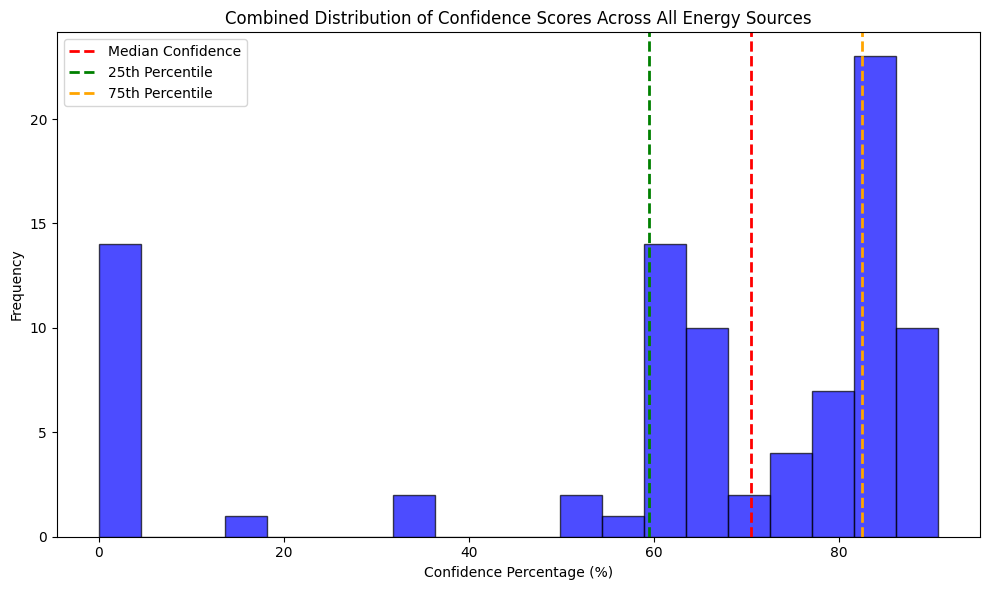

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Combine all confidence percentages into a single dataset
all_confidences = np.concatenate(list(confidence_percentages_all.values()))

# Plot a single histogram for all confidence percentages
plt.figure(figsize=(10, 6))
plt.hist(all_confidences, bins=20, alpha=0.7, color='b', edgecolor='black')

# Add vertical lines for overall statistics
plt.axvline(np.median(all_confidences), color='r', linestyle='dashed', linewidth=2, label="Median Confidence")
plt.axvline(np.percentile(all_confidences, 25), color='g', linestyle='dashed', linewidth=2, label="25th Percentile")
plt.axvline(np.percentile(all_confidences, 75), color='orange', linestyle='dashed', linewidth=2, label="75th Percentile")

# Set labels and title
plt.title("Combined Distribution of Confidence Scores Across All Energy Sources")
plt.xlabel("Confidence Percentage (%)")
plt.ylabel("Frequency")
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [22]:
# Compute percentiles and interquartile range (IQR)
Q1 = np.percentile(all_confidences, 25)  # 25th percentile
Q2 = np.percentile(all_confidences, 50)
Q3 = np.percentile(all_confidences, 75)  # 75th percentile
IQR = Q3 - Q1

# Set the confidence threshold to the 25th percentile
CONFIDENCE_THRESHOLD = Q2
print(f"Selected Confidence Threshold (25th Percentile): {CONFIDENCE_THRESHOLD:.2f}%")

Selected Confidence Threshold (25th Percentile): 70.52%


In [23]:
# Identify predictions with confidence scores below the threshold
uncertain_predictions = all_confidences[all_confidences < CONFIDENCE_THRESHOLD]

# Print summary of uncertain predictions
print(f"Number of Uncertain Predictions (< {CONFIDENCE_THRESHOLD:.2f}%): {len(uncertain_predictions)}")
if len(uncertain_predictions) > 0:
    print(f"Uncertain Predictions: {uncertain_predictions}")

Number of Uncertain Predictions (< 70.52%): 45
Uncertain Predictions: [ 0.         51.63975495  0.         63.75981664 32.52282891 60.84434728
  0.          0.         54.03852339 16.26910999 67.58548224 60.56748556
 65.49967606 63.066484   64.55302738 64.00628386 65.88810817 59.33340035
 60.80807735 58.94687797 63.45703423 65.2990402  62.45966588 59.50566819
 35.30875757 69.82368374 65.39267214 62.74928423 62.90944668 59.54120309
 64.11254601 64.04733019 62.0345625  56.89348039 59.37127378  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]


In [24]:
import numpy as np

# Compute the standard deviation of past prediction errors
errors = y_test_original - test_predictions_original
std_dev = np.std(errors, axis=0)

# Compute 95% confidence bounds
confidence_95 = 1.96 * std_dev

# Select the last 24-hour window for a single prediction
start_idx = -24
past_24_hours = df[energy_sources].values[start_idx:]
past_24_hours_scaled = scaler.transform(past_24_hours)

# Reshape input to match model format
X_single = past_24_hours_scaled.reshape(1, 24, len(energy_sources))

# Predict using the trained model
single_prediction_scaled = loaded_model.predict(X_single)

# Convert back to original scale
single_prediction_original = scaler.inverse_transform(single_prediction_scaled)[0]

# Compute confidence interval bounds for the single prediction
lower_bounds = np.maximum(single_prediction_original - confidence_95, 0)  # Ensure non-negative
upper_bounds = single_prediction_original + confidence_95

# Compute confidence percentages
confidence_threshold = 70.52
final_output = {}

print("\nFinal Prediction with Confidence Interval:")
for i, source in enumerate(energy_sources):
    pred_value = single_prediction_original[i]
    ci_width = upper_bounds[i] - lower_bounds[i]

    if pred_value > 0:
        confidence_percentage = 100 * (1 - (ci_width / pred_value))
    else:
        # If prediction is negative, use the upper bound as reference
        confidence_percentage = 100 * (1 - (ci_width / max(upper_bounds[i], 1)))  # Avoid division by zero

    confidence_percentage = max(confidence_percentage, 0)  # Ensure non-negative confidence

    final_output[source] = {
    "Prediction": "Uncertain" if confidence_percentage < confidence_threshold else f"{pred_value:.2f} MW",
    "Confidence": f"{confidence_percentage:.2f}%"
    }


    # Print detailed output
    print(f"{source}: {final_output[source]}, "
          f"95% CI = [{lower_bounds[i]:.2f}, {upper_bounds[i]:.2f}] MW, "
          f"Confidence = {confidence_percentage:.2f}%")

print("\nFinal Output:", final_output)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step

Final Prediction with Confidence Interval:
Consumption: {'Prediction': '4772.98 MW', 'Confidence': '79.55%'}, 95% CI = [4284.99, 5260.98] MW, Confidence = 79.55%
Production: {'Prediction': '5140.37 MW', 'Confidence': '79.68%'}, 95% CI = [4618.06, 5662.69] MW, Confidence = 79.68%
Nuclear: {'Prediction': '1359.83 MW', 'Confidence': '90.67%'}, 95% CI = [1296.40, 1423.26] MW, Confidence = 90.67%
Wind: {'Prediction': 'Uncertain', 'Confidence': '16.27%'}, 95% CI = [460.59, 1123.96] MW, Confidence = 16.27%
Hydroelectric: {'Prediction': 'Uncertain', 'Confidence': '58.95%'}, 95% CI = [1334.05, 2023.17] MW, Confidence = 58.95%
Oil and Gas: {'Prediction': 'Uncertain', 'Confidence': '35.31%'}, 95% CI = [392.90, 768.60] MW, Confidence = 35.31%
Coal: {'Prediction': 'Uncertain', 'Confidence': '59.37%'}, 95% CI = [473.32, 714.64] MW, Confidence = 59.37%
Solar: {'Prediction': 'Uncertain', 'Confidence': '0.00%'}, 95% CI = [0.00, 105.58] MW, Confidence = 0.00%
Biom

In [28]:
past_24_hours = df.drop(columns=['DateTime']).tail(24)

# Convert to list format for JSON request
past_24_hours_values = past_24_hours.values.tolist()

# Print or save the output
print(past_24_hours_values)


[[5323, 6668, 1392, 1673, 1934, 1086, 516, 0, 65], [4998, 6174, 1393, 1246, 1794, 1127, 548, 0, 64], [4860, 5939, 1391, 1009, 1835, 1103, 537, 0, 64], [4668, 5592, 1393, 841, 1715, 1032, 546, 0, 64], [4653, 5524, 1393, 773, 1723, 1028, 542, 0, 64], [4735, 5363, 1391, 702, 1695, 1005, 505, 0, 65], [4725, 5356, 1392, 576, 1810, 1012, 502, 0, 64], [4761, 5492, 1392, 447, 2068, 1002, 469, 54, 65], [4760, 5463, 1390, 249, 2044, 1005, 454, 256, 63], [4651, 5120, 1398, 118, 1552, 1017, 469, 498, 64], [4458, 4709, 1392, 104, 1085, 970, 437, 655, 64], [4563, 5609, 1394, 426, 1296, 889, 452, 749, 64], [4430, 5609, 1395, 462, 1130, 672, 451, 794, 64], [4428, 5577, 1396, 414, 983, 670, 452, 777, 64], [4083, 3824, 1393, 126, 564, 569, 418, 689, 63], [4145, 3715, 1392, 141, 508, 573, 439, 597, 65], [4859, 5498, 1395, 528, 1368, 731, 523, 424, 64], [5172, 5761, 1395, 556, 1760, 917, 539, 232, 64], [5424, 6228, 1395, 555, 2219, 918, 548, 47, 65], [5618, 5902, 1398, 505, 2294, 1012, 620, 6, 65], [6107,